In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import tweepy as tp
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary


In [2]:
df = pd.read_csv('wordcloud.csv')
df.head(10)

,Date,User,Isi,Sentiment,cleartweet
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...,netral,sesuai target dunia ancam resesi
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...,negatif,nyemplung sampe minus mustahil sih sampe q unt...
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...,netral,prediksi tumbuh lambat core indonesia p
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...,netral,ancam resesi global butuh bijak fiskal moneter...
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...,positif,lewat resesi global
5,2023-02-06 04:29:02+00:00,catatankaqihati,RT @Anggita_lung: Dengan pencabutan status PPK...,positif,cabut status ppkm optimis kondisi ekonomi indo...
6,2023-02-06 04:22:32+00:00,soloposdotcom,Resesi Global Disebut Tak Terlalu Berdampak ke...,netral,resesi global dampak ri respons rhenald kasali
7,2023-02-06 04:17:59+00:00,DdMulyadi2,RT @CoklatBenkBenk: Harga Minyak Diprediksi Je...,negatif,harga minyak prediksi jeblok usd barel analis ...
8,2023-02-06 04:12:19+00:00,Indiah752834981,Itu bukan prestasi nomor 1 didunia tapi byk ne...,negatif,prestasi nomor dunia byk negara resesi
9,2023-02-06 04:09:38+00:00,Di0nAngelo,RT @CoklatBenkBenk: Harga Minyak Diprediksi Je...,negatif,harga minyak prediksi jeblok usd barel analis ...


In [3]:
label=df.set_index(["Date","Isi","Sentiment","cleartweet"]).count(level="Sentiment")
label.head()

,User
Sentiment,
negatif,387
netral,432
positif,187


<AxesSubplot: title={'center': 'Dataset'}, xlabel='Sentiment', ylabel='Jumlah tweet'>

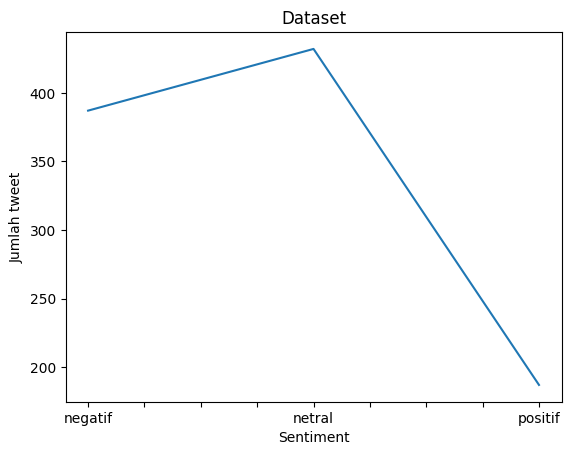

In [4]:
label['User'].plot.line(title='Dataset', xlabel='Sentiment', ylabel='Jumlah tweet')

In [5]:
df2 =  df[['cleartweet']]
df2.head()

,cleartweet
0,sesuai target dunia ancam resesi
1,nyemplung sampe minus mustahil sih sampe q unt...
2,prediksi tumbuh lambat core indonesia p
3,ancam resesi global butuh bijak fiskal moneter...
4,lewat resesi global


In [6]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
stop_factory = StopWordRemoverFactory().get_stop_words()

stopword = stop_factory

In [7]:
tweet_set = open("wordcloud.csv", "w", encoding="utf-8")
writer = csv.writer(tweet_set)

writer.writerow(['Date','User','Isi','Sentiment','cleartweet'])

for i, cleartweet in enumerate (df2['cleartweet'] +','+ df['Sentiment']):
    writer.writerow((i,cleartweet))

In [8]:
wordc = "".join(df2.cleartweet.values)

In [9]:
stopwords = set(STOPWORDS)
stopwords.update(['dm','sih','samapemulihan','dong','amp','tolong','china','korea','jepang','kak','ketpppliriknya','kian','beambahskrg','milu','kalo','min','nya','aja','yg','atau','kaya','susul', 'ada', 'lha','lah', 'adalah', 'adanya', 'agar', 'akan', 'aku', 'anda', 'antara', 'apa', 'apabila', 'apakah', 'apalagi', 'atas', 'adapun', 'agaknya', 'akan', 'akankah', 'akhirnya', 'akulah', 'amat', 'covid','amatlah', 'andalah', 'antar', 'antaranya', 'ataukah', 'ataupun', 'bagaimana', 'bagi', 'bahkan', 'bahwa', 'baik', 'banyak', 'baru', 'beberapa', 'belum', 'berapa', 'berbagai', 'bersama', 'bila', 'bisa', 'bagai', 'bagaikan', 'bagaimanakah', 'bagaimanapun', 'bahwasanya', 'beginikah', 'beginilah', 'begitu', 'begini', 'begitukah', 'begitulah', 'begitupun', 'belumlah', 'berapakah', 'berapalah', 'berapapun', 'bermacam', 'betulkah', 'biasa', 'biasanya', 'bilakah', 'bisakah', 'bolehlah', 'bolehkah', 'buat', 'bukannya', 'bukankah', 'bukanlah', 'contohnya', 'cukup', 'cuma', 'dan', 'dapat', 'dari', 'daripada', 'demikian', 'demikianlah', 'dengan', 'di', 'dia', 'dilakukan', 'dalam', 'dahulu', 'dekat', 'demi', 'depan', 'dialah', 'diantaranya', 'diantara', 'dikarenakan', 'dini', 'diri', 'dirinya', 'dulu', 'entah', 'entahlah', 'hal', 'hanya', 'harus', 'hingga', 'hanyalah', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'ia', 'ini', 'itu', 'ialah', 'itulah', 'ibarat', 'ingin', 'inginkah', 'inginkan', 'inikah', 'inilah', 'itukah', 'jadi', 'juga', 'jika', 'jikalau', 'jangan', 'janganlah', 'jangankan', 'justru', 'kalau', 'kita', 'kali', 'kami', 'kamu', 'kapan', 'karena', 'kata', 'katanya', 'kau', 'ke', 'kembali', 'kemudian', 'kepada', 'ketika', 'kini', 'kala', 'kalaulah', 'kalaupun', 'kalian', 'kamilah', 'kamulah', 'kapankah', 'kapanpun', 'karenanya', 'kecil', 'kenapa', 'kepadanya', 'khususnya', 'kinilah', 'kiranya', 'kitalah', 'kok', 'lagi', 'lama', 'lain', 'lainnya', 'lalu', 'langsung', 'lebih', 'luar', 'lainnya', 'lamanya', 'maka', 'malah', 'mana', 'masih', 'maupun', 'melalui', 'memang', 'mengapa', 'mengatakan', 'mengenai', 'menjadi', 'menurut', 'menyatakan', 'mereka', 'merupakan', 'meski', 'meskipun', 'misalnya', 'mulai', 'macam', 'makanya', 'makin', 'malahan', 'mampu', 'mampukah', 'manakala', 'manalagi', 'masihkah', 'masing', 'mau', 'melainkan', 'merekalah', 'mungkin', 'mungkinlah', 'namun', 'nah', 'nanti', 'nantinya', 'nyaris', 'oleh', 'olehnya', 'pada', 'padahal', 'paling', 'papar', 'paparnya', 'para', 'per', 'perlu', 'pernah', 'pula', 'pun', 'padanya', 'pantas', 'pasti', 'pastilah', 'percuma', 'rupanya', 'saat', 'saja', 'salah', 'saling', 'sama', 'sampai', 'sangat', 'saya', 'seandainya', 'sebab', 'sebagai', 'sebelum', 'sebuah', 'secara', 'sedang', 'sedangkan', 'sehingga', 'sejak', 'sejumlah', 'sekarang', 'sekitar', 'selain', 'selama', 'sementara', 'semua', 'sendiri', 'seorang', 'seperti', 'serta', 'seseorang', 'sesuatu', 'setelah', 'setiap', 'suatu', 'sudah', 'saatnya', 'sajalah', 'sambil', 'sana', 'sangatlah', 'sayalah', 'sebabnya', 'sebagaimana', 'sebagainya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebetulnya', 'sebisanya', 'sedemikian', 'sedikit', 'sedikitnya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sejenak', 'sekali', 'sekalian', 'sekaligus', 'sekalipun', 'seketika', 'sekiranya', 'sekitarnya', 'sela', 'selagi', 'selaku', 'selalu', 'selamanya', 'seluruhnya', 'semacam', 'semakin', 'semasih', 'semaunya', 'sempat', 'semuanya', 'semula', 'sendirinya', 'seolah', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'sepertinya', 'sering', 'seringnya', 'serupa', 'sesaat', 'sesama', 'sesegera', 'sesekali', 'seseorang', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'seterusnya', 'setidaknya', 'sewaktu', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'sudahkah', 'sudahlah', 'supaya', 'tak', 'tidak', 'tandas', 'tandasnya', 'tanpa', 'tapi', 'telah', 'tempat', 'tentang', 'terhadap', 'terjadi', 'termasuk', 'ternyata', 'tersebut', 'terus', 'tetap', 'tetapi', 'tadi', 'tadinya', 'tentu', 'tentulah', 'tentunya', 'terdiri', 'terhadapnya', 'terlalu', 'terlebih', 'tersebutlah', 'tertentu', 'tiap', 'tidakkah', 'tidaklah', 'ujar', 'ujarnya', 'untuk', 'walaupun', 'yaitu', 'yakni', 'yang', 'ya', 'waduh', 'wah', 'wahai', 'walau', 'wakil', 'waktu', 'waktunya', 'wanita', 'warga', 'warta', 'wib', 'wilayah', 'rt'])
def create_word_cloud(string):
    cloud = WordCloud(width = 1500, height = 1500,background_color = "white", max_words = 500 , stopwords=stopwords).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    cloud.to_file("preprocessing.png")

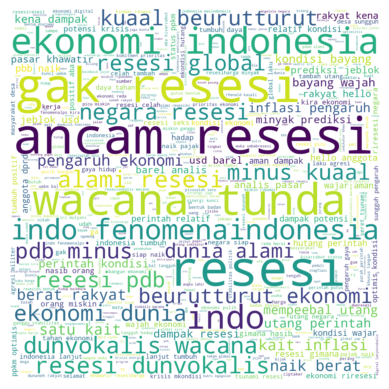

In [10]:
create_word_cloud(wordc)

In [11]:
df_negatif = df[ (df['Sentiment']=='negatif')]
df_netral = df[ (df['Sentiment']=='netral')]
df_positif =  df[ (df['Sentiment']=='positif')]
#convert to list
negatif_list=df_negatif['cleartweet'].tolist()
positif_list= df_positif['cleartweet'].tolist()
netral_list= df_netral['cleartweet'].tolist()


filtered_negatif = ("").join(str(negatif_list)) #convert the list into a string of spam
filtered_negatif = filtered_negatif.lower()

filtered_positif = ("").join(str(positif_list)) #convert the list into a string of ham
filtered_positif = filtered_positif.lower()

filtered_netral = ("").join(str(netral_list)) #convert the list into a string of ham
filtered_netral = filtered_netral.lower()

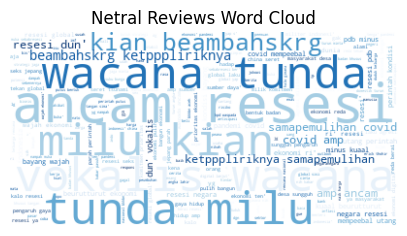

In [12]:
wordcloud = WordCloud(max_font_size = 100, margin=0, max_words = 200,background_color = "white", colormap="Blues").generate(filtered_netral)
plt.figure(figsize=[5,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Netral Reviews Word Cloud")
plt.show()

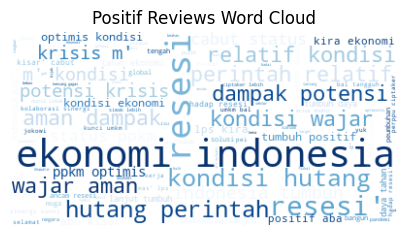

In [13]:
wordcloud = WordCloud(max_font_size = 100, margin=0, max_words = 200,background_color = "white", colormap="Blues").generate(filtered_positif)
plt.figure(figsize=[5,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positif Reviews Word Cloud")
plt.show()

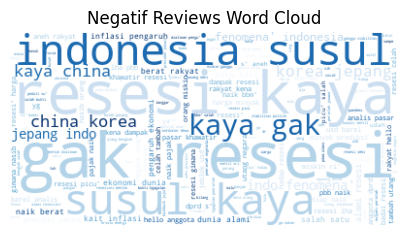

In [14]:
wordcloud = WordCloud(max_font_size = 100, margin=0, max_words = 200,background_color = "white", colormap="Blues").generate(filtered_negatif)
plt.figure(figsize=[5,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif Reviews Word Cloud")
plt.show()